<a href="https://colab.research.google.com/github/DevikaSreemon/Term-Deposit-Marketing/blob/project/Term_Market_Deposit_Part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Enhanced Modeling Approach: Predicting Customer Call Outcomes and Saving Time


**Objective**

To refine the modeling process by incorporating all features of the dataset, including call-related attributes, to:

Predict whether a customer should continue being contacted (potential subscribers) or not (non-subscribers).

Quantify the time saved by the company by reducing unnecessary customer calls.


### 1. Installing Libraries

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 355.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.1 MB/s eta 0:00:00
   ━

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


#### 1.1  Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, fbeta_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

### 2.  Loading dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/ApzivaProjects")

# Importing dataset
path = r'term-deposit-marketing-2020.csv'
data = pd.read_csv(f"{path}")

data

Mounted at /content/drive


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


##### Count of Yes and No before removing outliers

In [ ]:
# Specify the column name
column_name = 'y'

# Get the value counts and calculate percentages
value_counts = data[column_name].value_counts()
total_count = value_counts.sum()
percentages = (value_counts / total_count) * 100

# Print the count and percentage for each category
print("Category Counts and Percentages:")
for category, count in value_counts.items():
    percentage = (count / total_count) * 100
    print(f"Category: {category}, Count: {count}, Percentage: {percentage:.2f}%")

Category Counts and Percentages:
Category: no, Count: 37104, Percentage: 92.76%
Category: yes, Count: 2896, Percentage: 7.24%


In [ ]:
df1 = data

### 3.  Modelling

#### 3.1  Splitting and Training dataset

In [ ]:
from sklearn.model_selection import train_test_split
import random
seed = random.randint(1000,9999)
#seed = 4114  3453
# Assign the seed after experimenting
print(seed)

train, test = train_test_split(df1, test_size=0.2, random_state=seed)
#train, val = train_test_split(train, test_size=0.2, random_state=seed)
X_train = train.drop(columns=['y'])
y_train = train['y']

#X_val = val.drop(columns=['Y'])
#y_val = val['Y']

X_test = test.drop(columns=['y'])
y_test = test['y']

print(f"Training set has {len(X_train)} samples")
print(f"Training set has {len(y_train)} samples")
#print(f"Validation set has {len(X_val)} samples")
#print(f"Validation set has {len(y_val)} samples")
print(f"Test set has {len(X_test)} samples")
print(f"Test set has {len(y_test)} samples")

4263
Training set has 32000 samples
Training set has 32000 samples
Test set has 8000 samples
Test set has 8000 samples


##### Pycaret Algorithm

In [ ]:
from pycaret.classification import *

# Initialize the PyCaret environment
# Specify your target variable (output variable)
clf_setup = setup(df1, target='y', session_id=seed)

# Compare different models
best_model = compare_models()

# Create and evaluate a specific model (e.g., Logistic Regression)
lr_model = create_model('lr')
evaluate_model(lr_model)

# Tune hyperparameters for the best model
tuned_model = tune_model(best_model)

# Finalize the model
final_model = finalize_model(tuned_model)

predictions = predict_model(final_model, data= df1)

# Save the model for future use
save_model(final_model, 'final_model')

,Description,Value
0,Session id,8968
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(38995, 14)"
5,Transformed data shape,"(38995, 42)"
6,Transformed train set shape,"(27296, 42)"
7,Transformed test set shape,"(11699, 42)"
8,Numeric features,5
9,Categorical features,8


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9387,0.9499,0.9387,0.9308,0.9333,0.4552,0.4650,2.8340
gbc,Gradient Boosting Classifier,0.9386,0.9435,0.9386,0.9281,0.9300,0.4089,0.4308,5.2590
xgboost,Extreme Gradient Boosting,0.9372,0.9449,0.9372,0.9295,0.9322,0.4491,0.4569,1.7210
rf,Random Forest Classifier,0.9370,0.9379,0.9370,0.9247,0.9261,0.3645,0.3950,3.4740
et,Extra Trees Classifier,0.9348,0.9257,0.9348,0.9206,0.9226,0.3294,0.3618,3.7360
lr,Logistic Regression,0.9346,0.9248,0.9346,0.9209,0.9232,0.3392,0.3679,3.6960
ridge,Ridge Classifier,0.9331,0.9271,0.9331,0.9160,0.9142,0.2261,0.2861,0.4520
lda,Linear Discriminant Analysis,0.9317,0.9271,0.9317,0.9278,0.9296,0.4490,0.4505,1.0680
ada,Ada Boost Classifier,0.9313,0.9289,0.9313,0.9196,0.9233,0.3606,0.3748,1.5430
dummy,Dummy Classifier,0.9291,0.5000,0.9291,0.8632,0.8950,0.0000,0.0000,0.4220


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9388,0.9277,0.9388,0.9270,0.9268,0.3618,0.4012
1,0.9319,0.9219,0.9319,0.9146,0.9170,0.2728,0.3104
2,0.9330,0.9336,0.9330,0.9203,0.9238,0.3597,0.3776
3,0.9341,0.9194,0.9341,0.9202,0.9230,0.3405,0.3671
4,0.9344,0.9227,0.9344,0.9202,0.9223,0.3294,0.3608
5,0.9344,0.9371,0.9344,0.9200,0.9220,0.3250,0.3579
6,0.9340,0.9206,0.9340,0.9196,0.9222,0.3276,0.3568
7,0.9318,0.9139,0.9318,0.9169,0.9206,0.3183,0.3421
8,0.9373,0.9246,0.9373,0.9254,0.9274,0.3791,0.4051


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9363,0.9513,0.9363,0.9251,0.9279,0.3929,0.4109
1,0.9374,0.9421,0.9374,0.9264,0.9288,0.4017,0.4217
2,0.9352,0.9473,0.9352,0.9254,0.9286,0.4124,0.4237
3,0.9341,0.9386,0.9341,0.9232,0.9265,0.3903,0.4039
4,0.9381,0.9481,0.9381,0.9298,0.9325,0.4484,0.4582
5,0.9355,0.9512,0.9355,0.9242,0.9271,0.3897,0.4073
6,0.9381,0.9416,0.9381,0.9276,0.9301,0.4121,0.4304
7,0.9399,0.9439,0.9399,0.9309,0.9332,0.4444,0.4590
8,0.9392,0.9504,0.9392,0.9298,0.9322,0.4343,0.4497


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9574,0.9771,0.9574,0.9537,0.9543,0.6299,0.6392


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'balance', 'day',
                                              'duration', 'campaign'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=Fal...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_

##### Convert categorical features

In [ ]:
# Identify columns with 'object' dtype
object_cols = X_train.select_dtypes(include=['object']).columns

# Apply Label Encoding to convert categorical features to numerical
label_encoder = LabelEncoder()
for col in object_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

#### 3.1.1  Gradient Boosting Classifier

In [ ]:
# Initialize and train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=seed)

# Train the classifier
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred = gb_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Calculate F2 score
f2_score = fbeta_score(y_test, y_pred, beta=2, pos_label='yes')
print(f'F2 Score: {f2_score:.4f}\n')


Accuracy: 0.9404

Classification Report:

              precision    recall  f1-score   support

          no       0.95      0.98      0.97      7430
         yes       0.64      0.38      0.47       570

    accuracy                           0.94      8000
   macro avg       0.80      0.68      0.72      8000
weighted avg       0.93      0.94      0.93      8000

F2 Score: 0.4108



#### 3.1.2 LightGBM Classifier

In [ ]:
# Train the LightGBM model
clf = lgb.LGBMClassifier(random_state=seed)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Calculate F2 score
f2_score = fbeta_score(y_test, y_pred, beta=2, pos_label='yes')
print(f'F2 Score: {f2_score:.4f}\n')

[LightGBM] [Info] Number of positive: 2326, number of negative: 29674
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.072688 -> initscore=-2.546121
[LightGBM] [Info] Start training from score -2.546121
Accuracy: 0.9401

Classification Report:

              precision    recall  f1-score   support

          no       0.96      0.98      0.97      7430
         yes       0.61      0.43      0.51       570

    accuracy                           0.94      8000
   macro avg       0.79      0.71      0.74      8000
weighted avg       0.93      0.94      0.94      8000

F2 Score: 0.4603



#### 3.1.3 Extreme Gradient Boosting

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)  # Transform y_test using the same encoder

# Train the Extreme Gradient model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=seed)
xgb_clf.fit(X_train, y_train_encoded)  # Use the encoded target variable

# Make predictions
y_pred_encoded = xgb_clf.predict(X_test)

# Inverse transform predictions to original labels
y_pred = le.inverse_transform(y_pred_encoded)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Calculate F2 score
# Using 'yes' as pos_label since we've inverse transformed predictions
f2_score = fbeta_score(y_test, y_pred, beta=2, pos_label='yes')
print(f'F2 Score: {f2_score:.4f}\n')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:48:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9390

Classification Report:

              precision    recall  f1-score   support

          no       0.96      0.98      0.97      7430
         yes       0.60      0.44      0.51       570

    accuracy                           0.94      8000
   macro avg       0.78      0.71      0.74      8000
weighted avg       0.93      0.94      0.93      8000

F2 Score: 0.4633



#### 3.1.4 RandomForestClassifier

In [ ]:
# Initialize and train the Random Forest model
rf_clf = RandomForestClassifier(random_state=seed)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Calculate F2 score
# Set pos_label to 'yes' since 'yes' represents the positive class in your target variable
f2_score = fbeta_score(y_test, y_pred, beta=2, pos_label='yes')
print(f'F2 Score: {f2_score:.4f}\n')

Accuracy: 0.9367

Classification Report:

              precision    recall  f1-score   support

          no       0.95      0.98      0.97      7430
         yes       0.60      0.33      0.42       570

    accuracy                           0.94      8000
   macro avg       0.78      0.65      0.70      8000
weighted avg       0.93      0.94      0.93      8000

F2 Score: 0.3594



#### 3.1.5 ExtraTreesClassifier

In [ ]:
# Initialize and train the Extra Trees model
et_clf = ExtraTreesClassifier(random_state=seed)
et_clf.fit(X_train, y_train)

# Make predictions
y_pred = et_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Calculate F2 score
# Set pos_label to 'yes' since 'yes' represents the positive class in your target variable
f2_score = fbeta_score(y_test, y_pred, beta=2, pos_label='yes')
print(f'F2 Score: {f2_score:.4f}\n')

Accuracy: 0.9385

Classification Report:

              precision    recall  f1-score   support

          no       0.95      0.99      0.97      7430
         yes       0.68      0.26      0.38       570

    accuracy                           0.94      8000
   macro avg       0.81      0.63      0.67      8000
weighted avg       0.93      0.94      0.93      8000

F2 Score: 0.2998



####  3.1.6 Ridge Classifier

In [ ]:
# Initialize and train Ridge Classifier
ridge_clf = RidgeClassifier(class_weight='balanced', random_state=seed,)
ridge_clf.fit(X_train, y_train)

# Make predictions
y_pred = ridge_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Calculate F2 score
f2_score = fbeta_score(y_test, y_pred, beta=2, pos_label='yes')
print(f'F2 Score: {f2_score:.4f}\n')

Accuracy: 0.8769

Classification Report:

              precision    recall  f1-score   support

          no       0.98      0.89      0.93      7398
         yes       0.35      0.74      0.48       602

    accuracy                           0.88      8000
   macro avg       0.66      0.82      0.70      8000
weighted avg       0.93      0.88      0.90      8000

F2 Score: 0.6065



#### 3.1.7  Logistic Regression

In [ ]:
# Standardize the dataset (Logistic Regression benefits from feature scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train Logistic Regression
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Calculate F2 score
f2_score = fbeta_score(y_test, y_pred, beta=2, pos_label='yes')
print(f'F2 Score: {f2_score:.4f}\n')

Accuracy: 0.8516

Classification Report:

              precision    recall  f1-score   support

          no       0.98      0.86      0.91      7398
         yes       0.31      0.78      0.44       602

    accuracy                           0.85      8000
   macro avg       0.64      0.82      0.68      8000
weighted avg       0.93      0.85      0.88      8000

F2 Score: 0.5985



#### 3.1.8. ADA Classifier

In [ ]:
# Initialize and train ADA Classifier

# Increase the max_depth of the base estimator
base_estimator = DecisionTreeClassifier(max_depth=3)

ada_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=seed)
ada_clf.fit(X_train, y_train)
# Make predictions
y_pred = ada_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Calculate F2 score
f2_score = fbeta_score(y_test, y_pred, beta=2, pos_label='yes')
print(f'F2 Score: {f2_score:.4f}\n')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9380

Classification Report:

              precision    recall  f1-score   support

          no       0.96      0.97      0.97      7430
         yes       0.58      0.46      0.51       570

    accuracy                           0.94      8000
   macro avg       0.77      0.72      0.74      8000
weighted avg       0.93      0.94      0.93      8000

F2 Score: 0.4769



#### 3.1.9. Linear Discriminant Analysis

In [ ]:
# Train the Linear Discriminant Model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Make predictions
y_pred = lda.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Calculate F2 score
f2_score = fbeta_score(y_test, y_pred, beta=2, pos_label='yes')
print(f'F2 Score: {f2_score:.4f}\n')

Accuracy: 0.9343

Classification Report:

              precision    recall  f1-score   support

          no       0.95      0.98      0.96      7398
         yes       0.59      0.40      0.48       602

    accuracy                           0.93      8000
   macro avg       0.77      0.69      0.72      8000
weighted avg       0.93      0.93      0.93      8000

F2 Score: 0.4282



### 4. Applying Sampling Techniques on Ridge Classifier

#### 4.1 SMOTE-ENN Sampling

In [ ]:
# Import necessary libraries
from imblearn.combine import SMOTEENN

# Apply SMOTE-ENN
smote_enn = SMOTEENN(random_state=seed)
s_X_resampled, s_y_resampled = smote_enn.fit_resample(X_train, y_train)

# Initialize and train Ridge Classifier
ridge_clf = RidgeClassifier(random_state=seed)
ridge_clf.fit(s_X_resampled, s_y_resampled)

# Make predictions
y_pred = ridge_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Calculate F2 score
f2_score = fbeta_score(y_test, y_pred, beta=2, pos_label='yes')
print(f'F2 Score: {f2_score:.4f}\n')

Accuracy: 0.8456

Classification Report:

              precision    recall  f1-score   support

          no       0.98      0.85      0.91      7398
         yes       0.30      0.79      0.43       602

    accuracy                           0.85      8000
   macro avg       0.64      0.82      0.67      8000
weighted avg       0.93      0.85      0.87      8000

F2 Score: 0.5951



#### 4.2 SMOTE TOMEK Sampling

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=seed)
sm_X_resampled, sm_y_resampled = sm.fit_resample(X_train, y_train)

# Initialize and train Ridge Classifier
ridge_clf = RidgeClassifier(random_state=seed)
ridge_clf.fit(sm_X_resampled, sm_y_resampled)

# Make predictions
y_pred = ridge_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Calculate F2 score
f2_score = fbeta_score(y_test, y_pred, beta=2, pos_label='yes')
print(f'F2 Score: {f2_score:.4f}\n')

Accuracy: 0.8754

Classification Report:

              precision    recall  f1-score   support

          no       0.98      0.89      0.93      7398
         yes       0.35      0.74      0.47       602

    accuracy                           0.88      8000
   macro avg       0.66      0.81      0.70      8000
weighted avg       0.93      0.88      0.89      8000

F2 Score: 0.6045



#### 4.3  Random - Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Undersampling
rus = RandomUnderSampler(random_state=seed)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Initialize and train Ridge Classifier
ridge_clf = RidgeClassifier(random_state=seed)
ridge_clf.fit(X_resampled, y_resampled)

# Make predictions
y_pred = ridge_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Calculate F2 score
f2_score = fbeta_score(y_test, y_pred, beta=2, pos_label='yes')
print(f'F2 Score: {f2_score:.4f}\n')

Accuracy: 0.8740

Classification Report:

              precision    recall  f1-score   support

          no       0.98      0.88      0.93      7398
         yes       0.34      0.74      0.47       602

    accuracy                           0.87      8000
   macro avg       0.66      0.81      0.70      8000
weighted avg       0.93      0.87      0.89      8000

F2 Score: 0.6017



####4.4  Random - Over Sampling

In [ ]:
# Import necessary libraries
from imblearn.over_sampling import RandomOverSampler

# Apply Random Oversampling to balance the classes
ros = RandomOverSampler(random_state=seed)
o_X_train_resampled, o_y_train_resampled = ros.fit_resample(X_train, y_train)

# Initialize and train Ridge Classifier
ridge_clf = RidgeClassifier(random_state=seed)
ridge_clf.fit(o_X_train_resampled, o_y_train_resampled)

# Make predictions
y_pred = ridge_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Calculate F2 score
f2_score = fbeta_score(y_test, y_pred, beta=2, pos_label='yes')
print(f'F2 Score: {f2_score:.4f}\n')

Accuracy: 0.8766

Classification Report:

              precision    recall  f1-score   support

          no       0.98      0.89      0.93      7398
         yes       0.35      0.74      0.48       602

    accuracy                           0.88      8000
   macro avg       0.66      0.82      0.70      8000
weighted avg       0.93      0.88      0.90      8000

F2 Score: 0.6062



###5. Ensemble Model after Sampling

In [ ]:
from xgboost import XGBClassifier

# Convert o_y_train_resampled to numerical values (0 for 'no', 1 for 'yes')
o_y_train_resampled_numeric = o_y_train_resampled.map({'no': 0, 'yes': 1})

# Calculate scale_pos_weight using the numerical representation
scale_pos_weight = (len(o_y_train_resampled_numeric) - sum(o_y_train_resampled_numeric)) / sum(o_y_train_resampled_numeric)

# Initialize and train XGBClassifier
xgb_clf = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=seed)
xgb_clf.fit(o_X_train_resampled, o_y_train_resampled_numeric) # Use the numerical representation for training

# Make predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Convert predictions back to original labels
y_pred_xgb = ['yes' if pred == 1 else 'no' for pred in y_pred_xgb] # Convert numerical predictions back to 'yes' or 'no'

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_xgb))

# Calculate F2 score
f2_score = fbeta_score(y_test, y_pred_xgb, beta=2, pos_label='yes')
print(f'F2 Score: {f2_score:.4f}\n')

Accuracy: 0.9130

Classification Report:

              precision    recall  f1-score   support

          no       0.98      0.92      0.95      7398
         yes       0.45      0.78      0.57       602

    accuracy                           0.91      8000
   macro avg       0.72      0.85      0.76      8000
weighted avg       0.94      0.91      0.92      8000

F2 Score: 0.6817



##### Plotting ROC Curve

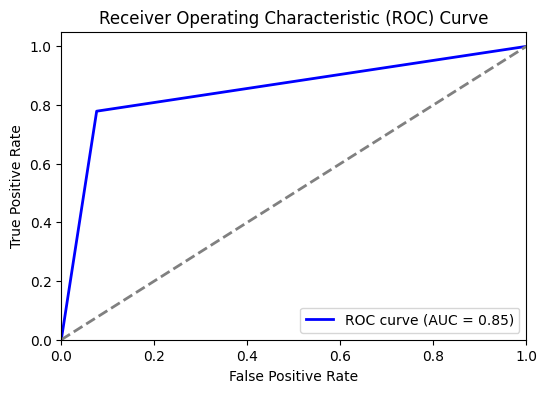

In [ ]:
# Calculate the ROC curve

# Convert y_test to numerical format (0 for 'no', 1 for 'yes')
y_test_numeric = [1 if label == 'yes' else 0 for label in y_test]
# Convert predictions back to original labels
y_pred_xgb = [1 if label == 'yes' else 0 for label in y_pred_xgb]

fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_xgb)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### 6. Hyperparamter tuning

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification


# Step 1: Initial Model Training with Cross-Validation to Tune 'n_estimators'
xgb_base = XGBClassifier(learning_rate=0.1)
param_grid_1 = {
    'n_estimators': [50, 100, 150, 200]
}

In [ ]:
grid_search_1 = GridSearchCV(estimator=xgb_base, param_grid=param_grid_1,
                             scoring='roc_auc', cv=5, verbose=1)
grid_search_1.fit(o_X_train_resampled, o_y_train_resampled_numeric)
best_n_estimators = grid_search_1.best_params_['n_estimators']

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
# Step 2: Tune Tree-Specific Parameters ('max_depth', 'min_child_weight', 'gamma')
param_grid_2 = {
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.5, 1]
}

xgb_tree_params = XGBClassifier(learning_rate=0.1, n_estimators=best_n_estimators)
grid_search_2 = GridSearchCV(estimator=xgb_tree_params, param_grid=param_grid_2,
                             scoring='roc_auc', cv=5, verbose=1)
grid_search_2.fit(o_X_train_resampled, o_y_train_resampled_numeric)
best_params_tree = grid_search_2.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
# Step 3: Tune Subsampling Parameters ('subsample', 'colsample_bytree')
param_grid_3 = {
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.9, 1.0]
}

xgb_sampling_params = XGBClassifier(learning_rate=0.1, n_estimators=best_n_estimators,
                                    max_depth=best_params_tree['max_depth'],
                                    min_child_weight=best_params_tree['min_child_weight'],
                                    gamma=best_params_tree['gamma'])
grid_search_3 = GridSearchCV(estimator=xgb_sampling_params, param_grid=param_grid_3,
                             scoring='roc_auc', cv=5, verbose=1)
grid_search_3.fit(o_X_train_resampled, o_y_train_resampled_numeric)
best_params_sampling = grid_search_3.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
# Step 4: Tune Regularization Parameters ('lambda', 'alpha')
param_grid_4 = {
    'reg_lambda': [0, 0.1, 1, 10],
    'alpha': [0, 0.1, 1, 10]
}

xgb_regularization_params = XGBClassifier(learning_rate=0.1, n_estimators=best_n_estimators,
                                          max_depth=best_params_tree['max_depth'],
                                          min_child_weight=best_params_tree['min_child_weight'],
                                          gamma=best_params_tree['gamma'],
                                          subsample=best_params_sampling['subsample'],
                                          colsample_bytree=best_params_sampling['colsample_bytree'])
grid_search_4 = GridSearchCV(estimator=xgb_regularization_params, param_grid=param_grid_4,
                             scoring='roc_auc', cv=5, verbose=1)
grid_search_4.fit(o_X_train_resampled, o_y_train_resampled_numeric)
best_params_regularization = grid_search_4.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
# Step 5: Final Model with All Best Parameters
final_model = XGBClassifier(
    learning_rate=0.01,  # Lower learning rate for better performance
    n_estimators=500,  # Increase number of trees
    max_depth=best_params_tree['max_depth'],
    min_child_weight=best_params_tree['min_child_weight'],
    gamma=best_params_tree['gamma'],
    subsample=best_params_sampling['subsample'],
    colsample_bytree=best_params_sampling['colsample_bytree'],
    reg_lambda=best_params_regularization['reg_lambda'],  # Use 'reg_lambda' instead of 'lambda'
    alpha=best_params_regularization['alpha']
)

# Train the final model
final_model.fit(o_X_train_resampled, o_y_train_resampled_numeric)

# Evaluate on the test set
y_pred_proba = final_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
y_pred_hp = (y_pred_proba >= 0.5).astype(int)

# Convert y_pred to string labels to match y_test
y_pred_hp = ['yes' if p == 1 else 'no' for p in y_pred_hp]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Final Model ROC-AUC Score: {roc_auc:.4f}")

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_hp))

# Calculate F2 score
f2_score = fbeta_score(y_test, y_pred_hp, beta=2, pos_label='yes')
print(f'F2 Score: {f2_score:.4f}\n')

Final Model ROC-AUC Score: 0.9487

Classification Report:

              precision    recall  f1-score   support

          no       0.98      0.94      0.96      7398
         yes       0.49      0.75      0.59       602

    accuracy                           0.92      8000
   macro avg       0.73      0.84      0.77      8000
weighted avg       0.94      0.92      0.93      8000

F2 Score: 0.6750



##### Plotting ROC Curve

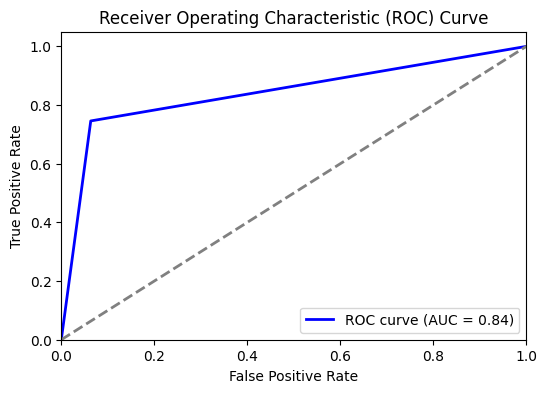

In [ ]:
# Calculate the ROC curve

# Convert y_test to numerical format (0 for 'no', 1 for 'yes')
y_test_numeric = [1 if label == 'yes' else 0 for label in y_test]
# Convert predictions back to original labels
y_pred_hp = [1 if label == 'yes' else 0 for label in y_pred_hp]

fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_hp)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

###7.  Trying Ensemble Models

####7.1. Bagging (Bootstrap Aggregating) - Random Forest

In [ ]:
# Train the final model
model = RandomForestClassifier(n_estimators=100, random_state=seed)
model.fit(o_X_train_resampled, o_y_train_resampled_numeric)

# Make predictions
y_predictions = model.predict(X_test)

# Convert predictions back to original labels
y_predictions = ['yes' if pred == 1 else 'no' for pred in y_predictions] # Convert numerical predictions back to 'yes' or 'no'

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_predictions)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_predictions))

# Calculate F2 score
f2_score = fbeta_score(y_test, y_predictions, beta=2, pos_label='yes')
print(f'F2 Score: {f2_score:.4f}\n')

Accuracy: 0.9356

Classification Report:

              precision    recall  f1-score   support

          no       0.95      0.98      0.97      7398
         yes       0.60      0.43      0.50       602

    accuracy                           0.94      8000
   macro avg       0.78      0.70      0.73      8000
weighted avg       0.93      0.94      0.93      8000

F2 Score: 0.4576



####7.2. Boosting using LGBMClassifier



[LightGBM] [Info] Number of positive: 29706, number of negative: 29706
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 696
[LightGBM] [Info] Number of data points in the train set: 59412, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.8885

Classification Report:

              precision    recall  f1-score   support

          no       0.99      0.89      0.94      7398
         yes       0.39      0.90      0.55       602

    accuracy                           0.89      8000
   macro avg       0.69      0.90      0.74      8000
weighted avg       0.95      0.89      0.91      8000

F2 Score: 0.7184



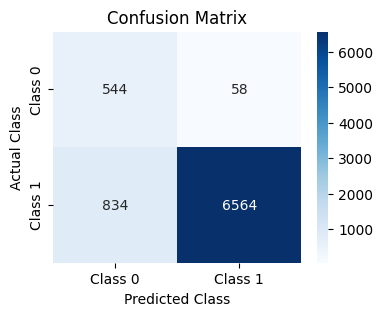

In [ ]:
# Train the final model
modellg = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=seed)
modellg.fit(o_X_train_resampled, o_y_train_resampled_numeric)

# Make predictions
y_predictions_lg = modellg.predict(X_test)

# Convert predictions back to original labels
y_predictions_lg = ['yes' if pred == 1 else 'no' for pred in y_predictions_lg] # Convert numerical predictions back to 'yes' or 'no'

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_predictions_lg)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_predictions_lg))

# Calculate F2 score
f2_score = fbeta_score(y_test, y_predictions_lg, beta=2, pos_label='yes')
print(f'F2 Score: {f2_score:.4f}\n')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_predictions_lg, labels=['yes', 'no'])

# Display confusion matrix as a plot
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

##### Plot ROC Curve

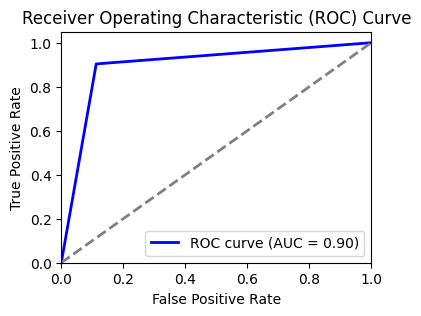

In [ ]:
# Calculate the ROC curve

# Convert y_test to numerical format (0 for 'no', 1 for 'yes')
y_test_numeric = [1 if label == 'yes' else 0 for label in y_test]
# Convert predictions back to original labels
y_predictions_lg = [1 if label == 'yes' else 0 for label in y_predictions_lg]

fpr, tpr, thresholds = roc_curve(y_test_numeric, y_predictions_lg)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### 8. **Conclusion**

In Part II of the analysis, I utilized the complete model to predict the number of subscribers who are likely to continue responding after identifying potential customers in the initial phase. The dataset was trained and modeled using multiple machine learning algorithms, and the final model selection was based on its performance with respect to the F2 score.

The F2 score is calculated as:
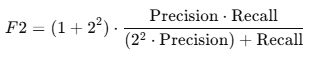

where:

Precision: The proportion of true positives out of all predicted positives.

Recall: The proportion of true positives out of all actual positives.

The
β=2 factor increases the weight of recall.

Why F2 Score?:

In this project, the priority is to identify as many potential subscribers as possible (high recall), by keeping the precision. The F2 score ensures that the model is optimized for this objective.

Application in Model Selection:

By comparing the F2 scores across multiple models, the one with the highest F2 score was chosen for predicting subscriber behavior. This ensures the model aligns with the business goal of maximizing customer retention and engagement.

After conducting thorough modeling and analysis, including sampling and hyperparameter tuning using the Grid Search method, I implemented ensemble techniques such as Boosting with the LightGBM classifier. This approach yielded improved results, achieving an F2 score of 72%.

Model Performance Insights:

**F2 Score:**

The F2 score of 72% highlights the model's effectiveness, especially in prioritizing recall over precision. This metric ensures that the model focuses on minimizing false negatives, aligning with the project's objective of identifying potential subscribers accurately.

**Recall for Class 0 (Non-subscribers):**

The recall of 89% for non-subscribers demonstrates that the model correctly identifies 89% of those who are unlikely to subscribe. This indicates strong performance in avoiding false negatives within this class.

**Recall for Class 1 (Subscribers)**:

With a high recall of 90% for subscribers, the model effectively captures almost all actual subscribers. This is critical for maximizing customer engagement and ensuring that potential customers are not overlooked.

This robust approach provides a reliable foundation for predicting future customer behavior and optimizing marketing strategies.

**Time Saved:**

Total calls company would make with the new model = (6564+58)6622

Total time = 6622 * avg time for call = 6622*4.23 = 28011 mins = 466.8 hours

Total call without model is 8000 and total time taken would be 33840 mins = 564 hours.

Hence, using this model the company would save 5829 calls with non subscribing customers by saving a time of 17.2%.

However, using the model we will lose around 10% of potential customers, which we predicted to be non-customer. This when compared to the larger dataset can be neglected executively. Or either after identifying the customer clusters, we could call the group of customers which were missed in this 10%.